In [1]:
## Тема “Обучение с учителем”
# Задание 1

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

data = boston["data"]
feature_names = boston["feature_names"]
target = boston["target"]

X = pd.DataFrame(data, columns=feature_names)
Y = pd.DataFrame(target, columns=["price"])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

y_pred = lr.predict(X_test)

In [93]:
check_test = pd.DataFrame({
    "Y_test": Y_test["price"],
    "y_pred": y_pred.flatten(),
})

check_test["error"] = check_test["y_pred"] - check_test["Y_test"]
check_test.head()

,Y_test,y_pred,error
173,23.6,28.648960,5.048960
274,32.4,36.495014,4.095014
491,13.6,15.411193,1.811193
72,22.8,25.403213,2.603213
452,16.1,18.855280,2.755280


In [7]:
from sklearn.metrics import r2_score
score_model_1 = r2_score(Y_test, y_pred)
r2_score(Y_test, y_pred)

0.711226005748496

In [53]:
# Задание 2

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

clf = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)
clf.fit(X_train, Y_train.values[:, 0])
y_pred = clf.predict(X_test)

In [10]:
check_test = pd.DataFrame({
    "Y_test": Y_test["price"],
    "y_pred": y_pred.flatten(),
})

check_test["error"] = check_test["y_pred"] - check_test["Y_test"]
score_model_2 = r2_score(Y_test, y_pred)
r2_score(Y_test, y_pred)

0.8749965273218174

In [11]:
print('\n', 'Результат модели 1 = ', score_model_1, '\n', 'Результат модели 2 = ', score_model_2, '\n', 'Вывод: Модель 2 лучше')


 Результат модели 1 =  0.711226005748496 
 Результат модели 2 =  0.8749965273218174 
 Вывод: Модель 2 лучше


In [104]:
# * Задание 3
# ?RandomForestRegressor

In [12]:
# model is the trained model
importances = clf.feature_importances_
# train_features is the dataframe of training features
feature_list = list(X_train.columns)
# Extract the feature importances into a dataframe
feature_results = pd.DataFrame({'feature': feature_list,'importance': importances})
# Show the top 10 most important
feature_results = feature_results.sort_values('importance',ascending = False).reset_index(drop=True)
feature_results.head(10)

,feature,importance
0,LSTAT,0.415679
1,RM,0.402705
2,DIS,0.064033
3,CRIM,0.032117
4,PTRATIO,0.018090
5,NOX,0.014368
6,AGE,0.014245
7,B,0.012311
8,TAX,0.011692
9,INDUS,0.007094


In [38]:
# *Задание 4

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

data = pd.read_csv('creditcard.csv')
df = pd.DataFrame(data)

In [39]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [40]:
pd.options.display.max_columns = 100
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [41]:
X = df.drop(['Class'], axis=1)
Y = df['Class']

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100, stratify=Y)

In [43]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((199364, 30), (85443, 30), (199364,), (85443,))

In [44]:
parameters = {
    'n_estimators': [10, 15],
    'max_features': np.arange(3, 5),
    'max_depth': np.arange(4, 7),
}

clf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=100),
    param_grid=parameters,
    scoring='roc_auc',
    cv=3,
)

In [45]:
clf.fit(X_train, Y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                 

In [46]:
cv_results = pd.DataFrame(clf.cv_results_)

param_columns = [
    column
    for column in cv_results.columns
    if column.startswith('param_')
]

score_columns = ['mean_test_score']

cv_results = (cv_results[param_columns + score_columns]
              .sort_values(by=score_columns, ascending=False))

cv_results.head(10)

,param_max_depth,param_max_features,param_n_estimators,mean_test_score
9,6,3,15,0.965969
7,5,4,15,0.962597
6,5,4,10,0.960201
11,6,4,15,0.959975
10,6,4,10,0.956352
3,4,4,15,0.955851
8,6,3,10,0.954698
5,5,3,15,0.949443
4,5,3,10,0.949299
2,4,4,10,0.941082


In [47]:
clf.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 15}

In [76]:
y_pred_proba = clf.predict_proba(X_test)
y_pred_proba[:10]

array([[9.99070828e-01, 9.29171738e-04],
       [9.99704794e-01, 2.95206364e-04],
       [9.99717846e-01, 2.82154033e-04],
       [9.99717846e-01, 2.82154033e-04],
       [9.99717846e-01, 2.82154033e-04],
       [9.99717846e-01, 2.82154033e-04],
       [9.99717846e-01, 2.82154033e-04],
       [9.99717846e-01, 2.82154033e-04],
       [9.99717846e-01, 2.82154033e-04],
       [9.99717846e-01, 2.82154033e-04]])

In [77]:
y_pred_proba = y_pred_proba[:, 1]

In [78]:
roc_auc_score(Y_test, y_pred_proba)

0.9462664156037156

In [79]:
# *Дополнительные задания:

In [99]:
from sklearn.datasets import load_wine
Wine = load_wine()
Wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [108]:
data = Wine['data']
data.shape

(178, 13)

In [110]:
target = Wine['target']
target.shape

(178,)

In [111]:
target_names = Wine['target_names']
target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [115]:
print(Wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [116]:
feature_names = Wine['feature_names']
feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [117]:
X = pd.DataFrame(data, columns=feature_names)
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [118]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [119]:
X['target'] = target

In [121]:
X.head(100)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12.47,1.52,2.20,19.0,162.0,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937.0,1
96,11.81,2.12,2.74,21.5,134.0,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625.0,1
97,12.29,1.41,1.98,16.0,85.0,2.55,2.50,0.29,1.77,2.90,1.23,2.74,428.0,1
98,12.37,1.07,2.10,18.5,88.0,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660.0,1


In [135]:
X['target'] = X['target'].astype(np.int64)
X['target'].dtype

dtype('int64')

In [144]:
X_corr = X.drop(['target'], axis=1).corr()
X_corr

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


In [140]:
import seaborn as sns

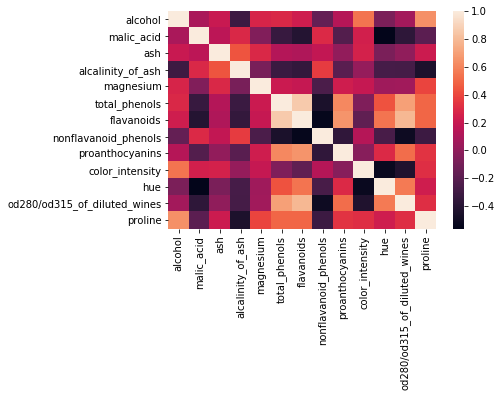

In [145]:
sns.heatmap(X_corr)

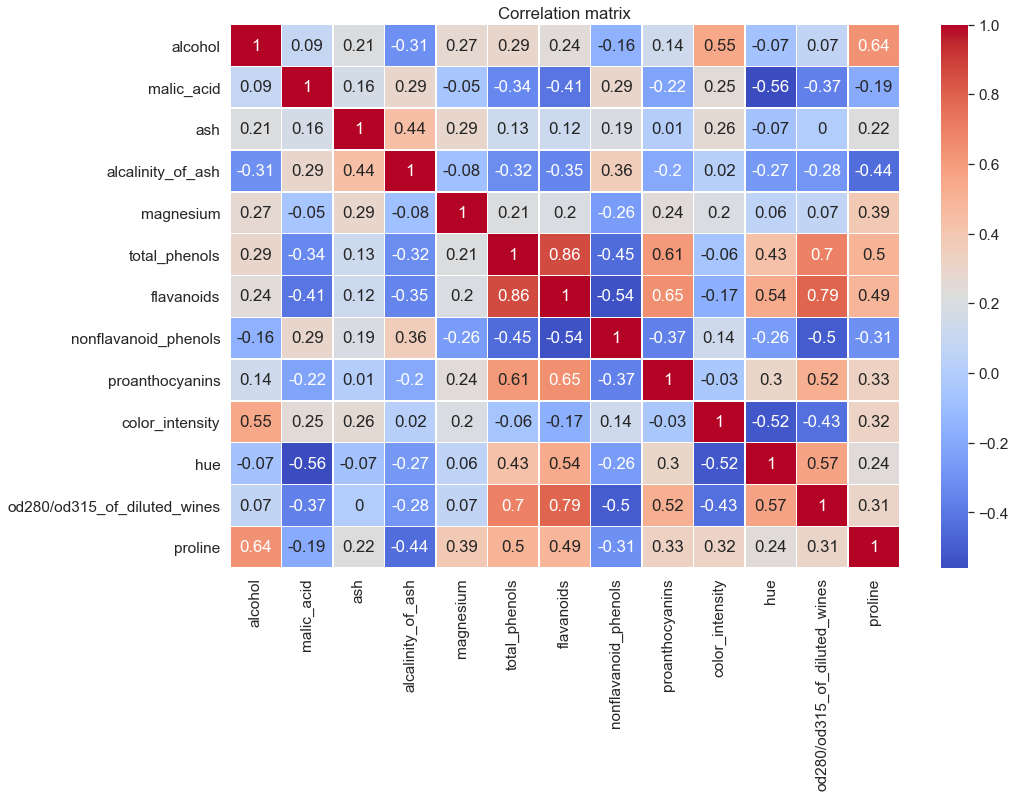

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

X_corr = X.drop(['target'], axis=1).corr()
X_corr = np.round(X_corr, 2)

sns.heatmap(X_corr, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

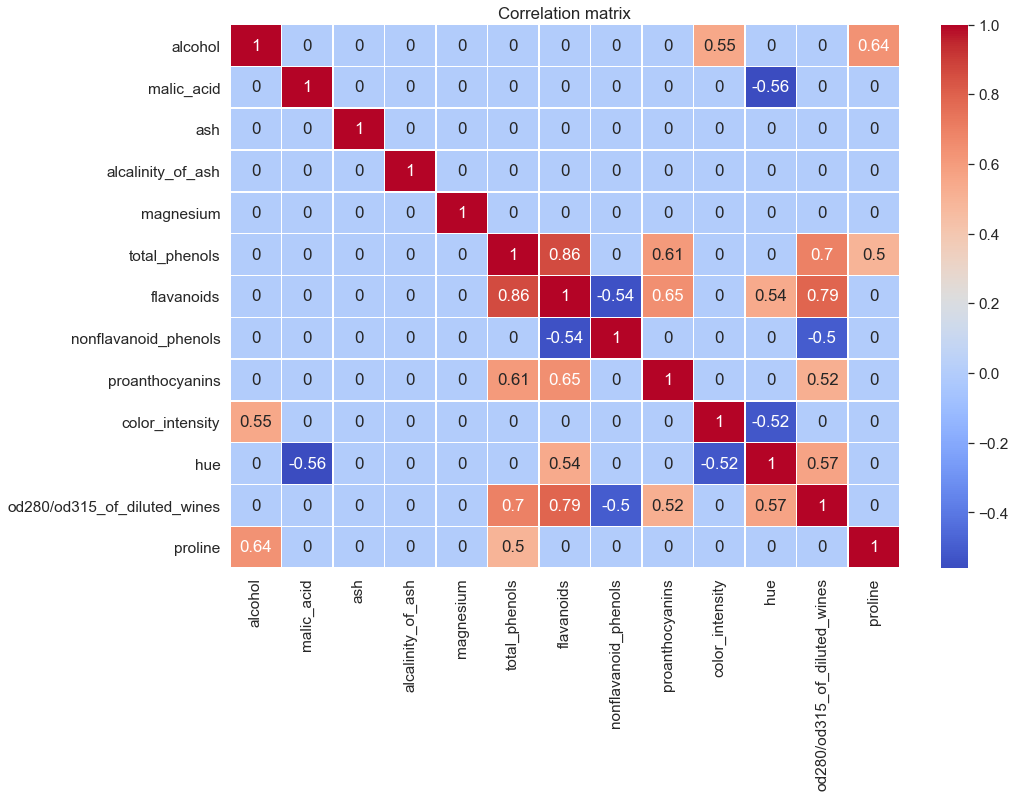

In [164]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

high_corr = X_corr[np.abs(X_corr) < 0.5] = 0
sns.heatmap(X_corr, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

In [194]:
corr_matrix = X.drop(['target'], axis=1).corr().abs()
high_corr_var=np.where(corr_matrix>0.5)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
np.unique(high_corr_var)

array(['alcohol', 'color_intensity', 'flavanoids', 'hue', 'malic_acid',
       'nonflavanoid_phenols', 'od280/od315_of_diluted_wines',
       'proanthocyanins', 'proline', 'total_phenols'], dtype='<U28')

In [206]:
X[['alcohol_2', 'color_intensity_2', 'flavanoids_2', 'hue_2', 'malic_acid_2',
       'nonflavanoid_phenols_2', 'od280/od315_of_diluted_wines_2',
       'proanthocyanins_2', 'proline_2', 'total_phenols_2']] = np.square(X[['alcohol', 'color_intensity', 'flavanoids', 'hue', 'malic_acid',
       'nonflavanoid_phenols', 'od280/od315_of_diluted_wines',
       'proanthocyanins', 'proline', 'total_phenols']])


X['target'] = target
X['target'] = X['target'].astype(np.int64)
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,alcohol_2,color_intensity_2,flavanoids_2,hue_2,malic_acid_2,nonflavanoid_phenols_2,od280/od315_of_diluted_wines_2,proanthocyanins_2,proline_2,total_phenols_2
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,1.780000e+02,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202,169.671428,30.928529,5.110049,0.968661,6.699528,0.146340,7.322155,2.856713,6.564591e+05,5.657030
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035,21.086573,28.872785,4.211441,0.443798,6.643747,0.098364,3.584316,2.047930,5.558591e+05,2.936294
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000,121.660900,1.638400,0.115600,0.230400,0.547600,0.016900,1.612900,0.168100,7.728400e+04,0.960400
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000,152.831425,10.368700,1.452100,0.612325,2.568025,0.072900,3.754075,1.562500,2.505010e+05,3.036325
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000,170.302500,21.996200,4.558250,0.931250,3.478250,0.115600,7.728400,2.418050,4.536045e+05,5.546050
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000,187.074025,38.440000,8.265700,1.254400,9.502725,0.191425,10.048900,3.802500,9.702250e+05,7.840000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000,219.928900,169.000000,25.806400,2.924100,33.640000,0.435600,16.000000,12.816400,2.822400e+06,15.054400
